# Nous importons un dataset qui contient les résultats des matchs du championnat football francais de la saison 2020-2021


In [ ]:
# Importation des librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
# Chargement du data set
data = pd.read_csv("2020_2021.csv")

In [63]:
# Affichage de la dimension du dataset
data.shape


(279, 105)

In [64]:
# Apercu du dataset
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,21/08/2020,18:00,Bordeaux,Nantes,0,0,D,0,0,...,1.43,0.00,1.86,2.04,1.85,2.07,1.90,2.24,1.82,2.05
1,F1,22/08/2020,16:00,Dijon,Angers,0,1,A,0,1,...,1.49,0.25,1.86,2.07,1.85,2.06,1.88,2.08,1.83,2.03
2,F1,22/08/2020,20:00,Lille,Rennes,1,1,D,1,0,...,1.64,-0.50,1.90,2.03,1.92,2.00,1.95,2.05,1.89,1.96
3,F1,23/08/2020,12:00,Monaco,Reims,2,2,D,1,2,...,1.62,-0.50,1.95,1.98,1.95,1.97,1.96,1.99,1.92,1.92
4,F1,23/08/2020,14:00,Lorient,Strasbourg,3,1,H,0,1,...,1.58,-0.25,2.08,1.85,2.09,1.83,2.14,1.86,2.07,1.80


In [65]:
# Affichages des types de données de chaque colonne,
# ainsi que le nombre d'élément pour chaque type
data.dtypes.value_counts()

float64    82
int64      16
object      7
dtype: int64

In [66]:
# Calcul le pourcentange de valeurs manquantes dans chaque colonne et affiche la moyenne 
((data.isna().sum() / data.shape[0])*100).mean()


# Plus le pourcentange des valeurs manquantes est grand dans une colonne,
# alors moins il est nécessaire de traiter ou d'annalyser cette colonne.
# On peut donc supprimer cette colonne par exemple 

# Dans notre cas le pourcentage des valeurs manquantes est quasiment nul

0.16726403823178015

In [67]:
# Affichage de certains paramètres statistiques pour chaque colonne.
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,278.000000,278.000000
mean,1.376344,1.326165,0.655914,0.620072,12.673835,10.845878,4.275986,3.741935,13.258065,12.616487,...,1.947742,-0.200717,1.952903,1.958387,1.960860,1.966882,2.002652,2.012616,1.923813,1.929424
std,1.219570,1.120956,0.833144,0.748446,5.115683,4.475502,2.585063,2.113182,3.440877,3.637319,...,0.456919,0.785743,0.101916,0.103385,0.102104,0.103788,0.101330,0.112713,0.095671,0.095930
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,5.000000,...,1.430000,-2.750000,1.650000,1.730000,1.660000,1.760000,1.820000,1.800000,1.680000,1.750000
25%,0.000000,1.000000,0.000000,0.000000,9.000000,8.000000,2.000000,2.000000,11.000000,10.000000,...,1.670000,-0.500000,1.870000,1.875000,1.880000,1.880000,1.920000,1.920000,1.840000,1.850000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,4.000000,13.000000,12.000000,...,1.810000,-0.250000,1.950000,1.970000,1.950000,1.970000,2.000000,2.010000,1.910000,1.930000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,16.000000,15.000000,...,2.055000,0.250000,2.040000,2.050000,2.040000,2.050000,2.090000,2.100000,2.000000,2.010000
max,6.000000,5.000000,4.000000,3.000000,31.000000,30.000000,13.000000,12.000000,23.000000,25.000000,...,4.410000,2.250000,2.190000,2.200000,2.180000,2.310000,2.210000,2.380000,2.130000,2.210000


In [70]:
# Retirer toutes les colonnes qui concernent les paris 
# Nous constatons que les colonnes qui contiennent les informations sur les paris sont tous des flottants
# Donc on peut les extraire

is_not_float = data.dtypes != 'float'
data = data[data.columns[is_not_float]]

data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,F1,21/08/2020,18:00,Bordeaux,Nantes,0,0,D,0,0,...,1,1,10,15,2,3,2,3,1,0
1,F1,22/08/2020,16:00,Dijon,Angers,0,1,A,0,1,...,1,4,15,8,3,9,0,0,0,0
2,F1,22/08/2020,20:00,Lille,Rennes,1,1,D,1,0,...,1,3,12,16,4,2,0,1,1,1
3,F1,23/08/2020,12:00,Monaco,Reims,2,2,D,1,2,...,5,3,8,14,8,1,1,3,0,0
4,F1,23/08/2020,14:00,Lorient,Strasbourg,3,1,H,0,1,...,7,1,17,10,6,1,3,2,0,0


In [76]:
# on calcule les corréaltions entre colonnes (coeff. de correlation de Pearson)
pd.set_option('precision', 2)
data.corr(method='pearson')

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FTHG,1.00,-1.22e-01,6.98e-01,-6.35e-02,3.59e-01,-0.02,0.64,-9.48e-02,-1.81e-02,-0.07,1.12e-01,7.18e-02,-1.79e-02,0.02,-0.09,0.09
FTAG,-0.12,1.00e+00,-7.97e-02,6.67e-01,-1.44e-01,0.27,-0.12,6.14e-01,-8.81e-02,-0.02,-6.85e-03,9.36e-03,7.25e-02,0.06,0.15,-0.15
HTHG,0.70,-7.97e-02,1.00e+00,-7.20e-02,8.50e-02,0.12,0.36,-1.38e-02,3.48e-03,-0.11,5.88e-03,2.14e-01,-3.91e-02,-0.02,0.01,-0.04
HTAG,-0.06,6.67e-01,-7.20e-02,1.00e+00,-5.24e-03,0.09,-0.07,3.88e-01,1.59e-02,0.09,1.55e-01,-5.55e-02,5.99e-02,0.12,0.03,-0.08
HS,0.36,-1.44e-01,8.50e-02,-5.24e-03,1.00e+00,-0.29,0.69,-1.91e-01,-1.04e-01,-0.11,5.72e-01,-2.69e-01,-6.64e-02,0.05,-0.18,0.18
AS,-0.02,2.67e-01,1.22e-01,9.09e-02,-2.94e-01,1.00,-0.11,6.18e-01,-7.85e-02,-0.02,-3.58e-01,4.88e-01,1.34e-02,-0.09,0.21,-0.17
HST,0.64,-1.23e-01,3.57e-01,-6.83e-02,6.92e-01,-0.11,1.00,-1.34e-01,-1.21e-01,-0.13,3.32e-01,-7.43e-02,-6.52e-02,0.05,-0.10,0.05
AST,-0.09,6.14e-01,-1.38e-02,3.88e-01,-1.91e-01,0.62,-0.13,1.00e+00,-7.79e-02,-0.03,-2.48e-01,2.41e-01,-8.50e-03,-0.05,0.15,-0.17
HF,-0.02,-8.81e-02,3.48e-03,1.59e-02,-1.04e-01,-0.08,-0.12,-7.79e-02,1.00e+00,0.05,-5.26e-02,-4.72e-02,2.62e-01,-0.02,-0.05,0.10
AF,-0.07,-1.95e-02,-1.14e-01,9.30e-02,-1.11e-01,-0.02,-0.13,-3.12e-02,5.05e-02,1.00,-1.32e-01,-2.16e-02,8.65e-02,0.35,0.07,0.08


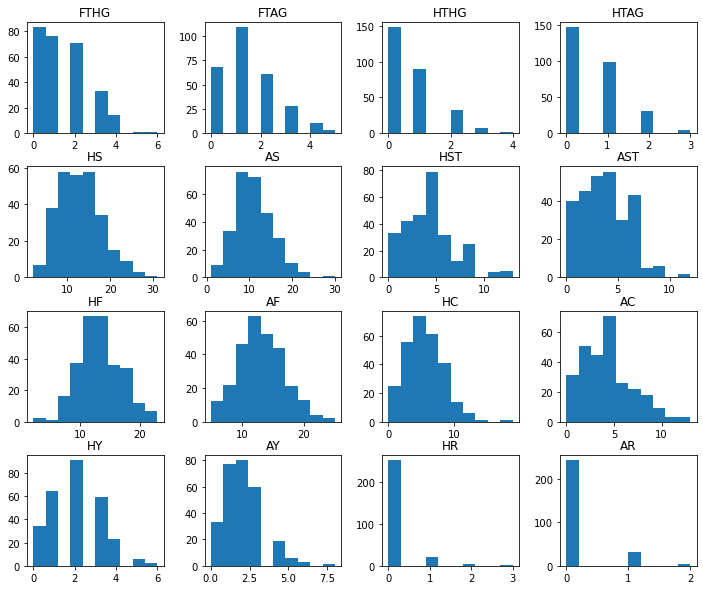

In [85]:
# Visualisation des données

# histogrammes
data.hist(figsize=(12,10),grid=False);


# Pour la première variable FTHG par exemple, 
# en ordonné on a le nombre de matchs,
# et en abscisse le nombre de buts